<a href="https://colab.research.google.com/github/Sabrina-Hendricks/DS4002-Group13-Project2/blob/main/Scripts/MI3_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, r2_score

Import data from github

In [43]:
url = 'https://raw.githubusercontent.com/Sabrina-Hendricks/DS4002-Group13-Project2/refs/heads/main/Data/Cleaned_Data.csv'
df = pd.read_csv(url)
df.head()

,category,service,year,quarter,spending
0,Outpatient services,Physician services,2004,Q1,306.6
1,Outpatient services,Dental services,2004,Q1,81.0
2,Outpatient services,Paramedical services,2004,Q1,188.0
3,Hospital and nursing home services,Hospitals,2004,Q1,518.4
4,Hospital and nursing home services,Nursing homes,2004,Q1,108.0


Predictions for the future

<ipython-input-44-ba63dddc2baf>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['time'] = pd.to_datetime(df['year'].astype(str) + 'Q' + df['quarter'].str[-1])
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
<ipython-input-44-ba63dddc2baf>:28: FutureWarning: Series.__getitem__ treati

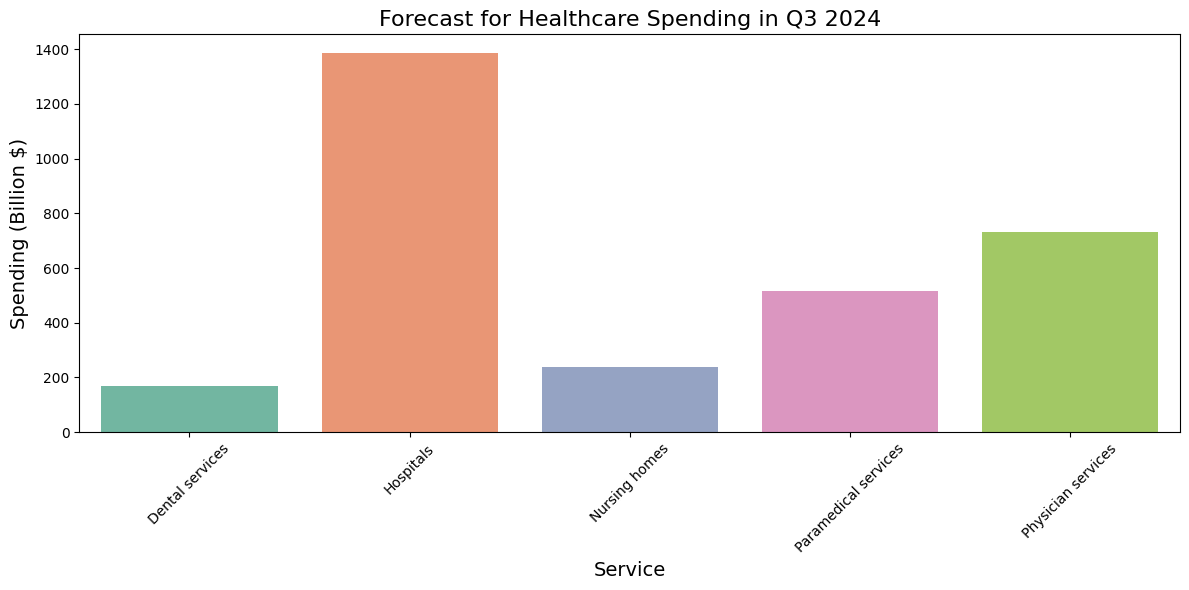

<ipython-input-44-ba63dddc2baf>:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Service', y='2025 Forecast', data=full_2025_df, palette='Set2')


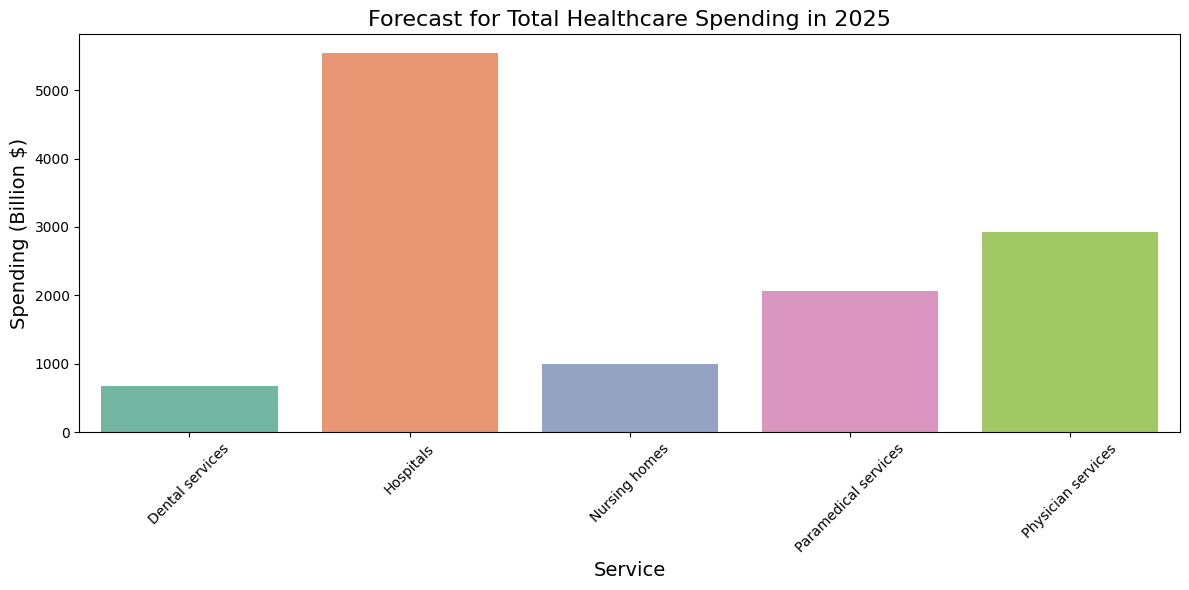

In [44]:
# Data preparation
df['time'] = df['year'].astype(str) + '-Q' + df['quarter'].str[-1]
df = df.sort_values(by=['service', 'time'])

# Convert 'time' to a datetime format for time series modeling
df['time'] = pd.to_datetime(df['year'].astype(str) + 'Q' + df['quarter'].str[-1])

# Set 'time' as the index for ARIMA modeling
df.set_index('time', inplace=True)

# Loop over each service for individual predictions
predictions_q3_2024 = {}
predictions_2025 = {}

for service in df['service'].unique():
    # Filter the data for the current service
    service_data = df[df['service'] == service]['spending']

    # Train-test split (holding out last 4 quarters for evaluation)
    train_data = service_data[:-4]
    test_data = service_data[-4:]

    # Fit ARIMA model (order can be tuned, here using (1,1,1) as a starting point)
    model = ARIMA(train_data, order=(1, 1, 1))
    fitted_model = model.fit()

    # Forecast Q3 2024
    forecast_q3_2024 = fitted_model.forecast(steps=3)[-1]  # Step 3 corresponds to Q3 2024
    predictions_q3_2024[service] = forecast_q3_2024

    # Forecast for all of 2025 (4 quarters)
    forecast_2025 = fitted_model.forecast(steps=8)[-4:]  # Last 4 steps are 2025 quarters
    predictions_2025[service] = forecast_2025.sum()  # Summing the quarterly forecasts for yearly spending

# Convert predictions to DataFrame for plotting
q3_2024_df = pd.DataFrame(predictions_q3_2024.items(), columns=['Service', 'Q3 2024 Forecast'])
full_2025_df = pd.DataFrame(predictions_2025.items(), columns=['Service', '2025 Forecast'])

# Plot Q3 2024 Forecasts
plt.figure(figsize=(12, 6))
sns.barplot(x='Service', y='Q3 2024 Forecast', data=q3_2024_df, palette='Set2')
plt.title('Forecast for Healthcare Spending in Q3 2024', fontsize=16)
plt.xlabel('Service', fontsize=14)
plt.ylabel('Spending (Billion $)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot 2025 Forecasts
plt.figure(figsize=(12, 6))
sns.barplot(x='Service', y='2025 Forecast', data=full_2025_df, palette='Set2')
plt.title('Forecast for Total Healthcare Spending in 2025', fontsize=16)
plt.xlabel('Service', fontsize=14)
plt.ylabel('Spending (Billion $)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Assess model's performance

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be use

Model Performance Evaluation:

Mean Absolute Error (MAE):
                Service        MAE
0       Dental services   8.059354
1             Hospitals  58.647836
2         Nursing homes   3.326313
3  Paramedical services  46.622545
4    Physician services  29.358330

R-squared (R²):
                Service  R-squared
0       Dental services  -3.864296
1             Hospitals  -3.515427
2         Nursing homes   0.760053
3  Paramedical services  -5.743237
4    Physician services  -2.643516


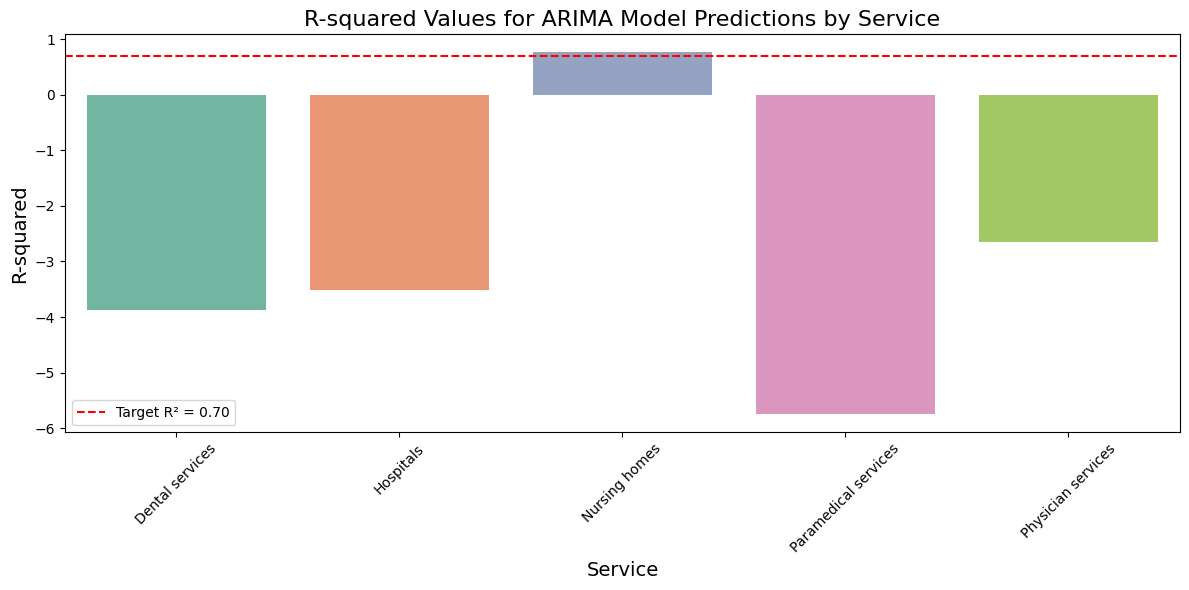

In [49]:
from sklearn.metrics import mean_absolute_error, r2_score

# Initialize dictionaries to store MAE and R-squared values for each service
mae_scores = {}
r2_scores = {}

# Loop over each service for individual evaluation
for service in df['service'].unique():
    # Filter the data for the current service
    service_data = df[df['service'] == service]['spending']

    # Train-test split (holding out last 4 quarters for evaluation)
    train_data = service_data[:-4]
    test_data = service_data[-4:]

    # Fit ARIMA model (order can be tuned, here using (1,1,1) as a starting point)
    model = ARIMA(train_data, order=(1, 1, 1))
    fitted_model = model.fit()

    # Forecast the same period as the test set (4 steps)
    forecast = fitted_model.forecast(steps=4)

    # Calculate MAE and R-squared for the test set
    mae = mean_absolute_error(test_data, forecast)
    r2 = r2_score(test_data, forecast)

    # Store the results
    mae_scores[service] = mae
    r2_scores[service] = r2

# Convert MAE and R-squared results to DataFrames for better readability
mae_df = pd.DataFrame(mae_scores.items(), columns=['Service', 'MAE'])
r2_df = pd.DataFrame(r2_scores.items(), columns=['Service', 'R-squared'])

# Display the results
print("Model Performance Evaluation:")
print("\nMean Absolute Error (MAE):")
print(mae_df)
print("\nR-squared (R²):")
print(r2_df)

# Plot R-squared values to see which services meet the R² > 0.70 target
plt.figure(figsize=(12, 6))
sns.barplot(x='Service', y='R-squared', data=r2_df, palette='Set2')
plt.axhline(0.70, color='red', linestyle='--', label='Target R² = 0.70')
plt.title('R-squared Values for ARIMA Model Predictions by Service', fontsize=16)
plt.xlabel('Service', fontsize=14)
plt.ylabel('R-squared', fontsize=14)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
